In [510]:
#########################################################
# This work is solution for solving gridworld problem   #
# using MC estimation                                   #
# author : prateek khandelwal                           #
# email : khandelwalprateek01@gmail.com                 #
#########################################################
import numpy as np
import pandas as pd
from collections import defaultdict
import IPython.display as Disp
import matplotlib.pyplot as plt
plt.style.use("ggplot")

##--- initialization---##




# L--> left ; R-->right, U-->up, T--> terminal

policy = np.array([["T","L","L","L"],["U","U","D","D"],["U","U","D","D"],["U","R","R","T"]])
grid_shape = policy.shape
states = np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
reward = -1
gamma = 1
non_terminal_states = states.flatten()[1:-1]
terminal_state = [0,15]
val_coord_dict = {}
for idx,row in enumerate(states):
    for idx1,val in enumerate(row):
        val_coord_dict[val] = (idx,idx1)
coord_val_dict = dict(zip(val_coord_dict.values(),val_coord_dict.keys()))
#above are dictionaries giving location of each state in coordinate terms

In [111]:
#----------------support function to generate neighbouring state---------------------#
def get_neigbouring_state(query_state):
    """
    given a state point it will return neighbouring states
    for a corner state if the state is outside boundary then it will return to original point
    return clockwise starting from the optimal policy
    
    """
    # left up right bottom
    r,c = coords = val_coord_dict[query_state] ## here coords are rows and columns
#     print("query coords",coords)
    neigbouring_state = [(r,c-1),(r-1,c),(r,c+1),(r+1,c)]
    if c-1<0:
        neigbouring_state[0] = (r,c)
    if r-1<0:
        neigbouring_state[1] = (r,c)
    if c+1>=grid_shape[1]:
        neigbouring_state[2] = (r,c)
    if r+1>=grid_shape[0]:
        neigbouring_state[3] = (r,c)
    # neigbouring_state = [ query_state if i<0 else i for i in neigbouring_state]
#     print("neighbouring states  are {}".format(neigbouring_state))
    neigbouring_state = [coord_val_dict[i] for i in neigbouring_state]
    
    optimal_action = policy[coords]
#     print("optimal action is {}".format(optimal_action))
    if optimal_action=="L":
        return neigbouring_state,optimal_action
    elif optimal_action=="U":
        return neigbouring_state[1:]+[neigbouring_state[0]],optimal_action
    elif optimal_action=="R":
        return neigbouring_state[2:]+neigbouring_state[:2],optimal_action
    else:
        return neigbouring_state[3:]+neigbouring_state[:3],optimal_action

In [116]:
def get_next_state(current_state):
    """
    from current state based on probability generated create next state
    based on observation, the policy preferred action(direction) was always chosen with probabiliy .7
    """
    rand_prob = np.random.rand()
    neighbouring_state,action_taken = get_neigbouring_state(current_state)
    if rand_prob<.7:
        next_state = neighbouring_state[0]
    elif rand_prob<.8:
        next_state = neighbouring_state[1]
    elif rand_prob<.9:
        next_state = neighbouring_state[2]
    else:
        next_state = neighbouring_state[3]
    return next_state,action_taken
    

In [550]:
def generate_episode():
    next_state = np.random.choice(non_terminal_states) ## Exploratory start point
    episode = []
    while True:
        prev_state = next_state
        next_state,action_taken = get_next_state(prev_state)
        episode.append((prev_state,action_taken,reward))
        if next_state in terminal_state:
            break
    episode.append((prev_state,action_taken,reward))# assuming reward for terminal state is also -1
    episode.append((next_state))
    return episode
        


In [551]:
first_visit_value_dict = {}
every_visit_value_dict = {}
def reinit_val_dict():
    """
    this initial dictionary as null values
    """
    for i in states.flatten():
        first_visit_value_dict[i] = []
        every_visit_value_dict[i] = []
def first_visit_value_f(episode):
    """
    only difference is state which is repeated is filtered out
    """
    
    total_len = len(episode)
    visited = []
    for idx,(s,a,r) in enumerate(episode[:-1]):
        if s in visited: # then go to next state
            continue
        else:
            first_visit_value_dict[s].append(-1*(total_len-idx-1))
        visited.append(s)
def every_visit_value_f(episode):
    
    total_len = len(episode)
    visited = []
    for idx,(s,a,r) in enumerate(episode[:-1]):
        every_visit_value_dict[s].append(-1*(total_len-idx-1))
        visited.append(s)


In [554]:
df_1_li = []
df_2_li = []
reinit_val_dict()
if __name__=="__main__":
    for i in range(1,251):
        episode = generate_episode()
        first_visit_value_f(episode)
        every_visit_value_f(episode)
        if i%50==0:
            df_1 = pd.DataFrame({"state":first_visit_value_dict.keys(),"value_{}".format(i):[np.nanmean(i) for i in first_visit_value_dict.values()]})
            df_1.set_index("state",inplace=True)
            df_2 = pd.DataFrame({"state":every_visit_value_dict.keys(),"value_{}".format(i):[np.nanmean(i) for i in every_visit_value_dict.values()]})
            df_2.set_index("state",inplace=True)
            df_1_li.append(df_1)
            df_2_li.append(df_2)
df_1_comb  = pd.concat( df_1_li,axis=1)
df_2_comb = pd.concat(df_2_li,axis=1)
Disp.display("Results of FIRST VISIT MC ",df_1_comb)
Disp.display("Results of EVERY VISIT MC ",df_2_comb)

<ipython-input-554-964ea619d538>:10: RuntimeWarning: Mean of empty slice
  df_1 = pd.DataFrame({"state":first_visit_value_dict.keys(),"value_{}".format(i):[np.nanmean(i) for i in first_visit_value_dict.values()]})
<ipython-input-554-964ea619d538>:12: RuntimeWarning: Mean of empty slice
  df_2 = pd.DataFrame({"state":every_visit_value_dict.keys(),"value_{}".format(i):[np.nanmean(i) for i in every_visit_value_dict.values()]})


'Results of FIRST VISIT MC '

,value_50,value_100,value_150,value_200,value_250
state,,,,,
0,NaN,NaN,NaN,NaN,NaN
1,-2.333333,-2.794118,-2.759259,-2.945205,-2.879121
2,-3.500000,-4.357143,-4.136364,-4.242424,-4.097561
3,-5.500000,-5.400000,-5.538462,-5.666667,-5.571429
4,-3.222222,-2.541667,-2.727273,-2.622222,-2.686275
5,-3.666667,-4.300000,-4.058824,-4.382979,-4.266667
6,-5.833333,-5.833333,-5.529412,-5.464286,-5.194444
7,-4.000000,-4.666667,-4.352941,-4.636364,-4.500000
8,-4.250000,-3.944444,-4.230769,-4.371429,-4.333333


'Results of EVERY VISIT MC '

,value_50,value_100,value_150,value_200,value_250
state,,,,,
0,NaN,NaN,NaN,NaN,NaN
1,-1.725000,-2.111111,-2.047244,-2.148571,-2.105991
2,-3.500000,-4.611111,-4.250000,-4.431818,-4.264151
3,-5.000000,-5.166667,-5.294118,-5.333333,-5.296296
4,-2.444444,-1.914894,-2.000000,-1.934066,-2.000000
5,-3.642857,-4.440000,-4.150000,-4.440678,-4.337838
6,-6.142857,-5.857143,-5.428571,-5.382353,-5.166667
7,-4.000000,-4.647059,-4.409091,-4.857143,-4.666667
8,-5.000000,-4.260870,-4.457143,-4.446809,-4.384615


<AxesSubplot:title={'center':'absolute difference of first visit method values from the mean'}, xlabel='state'>

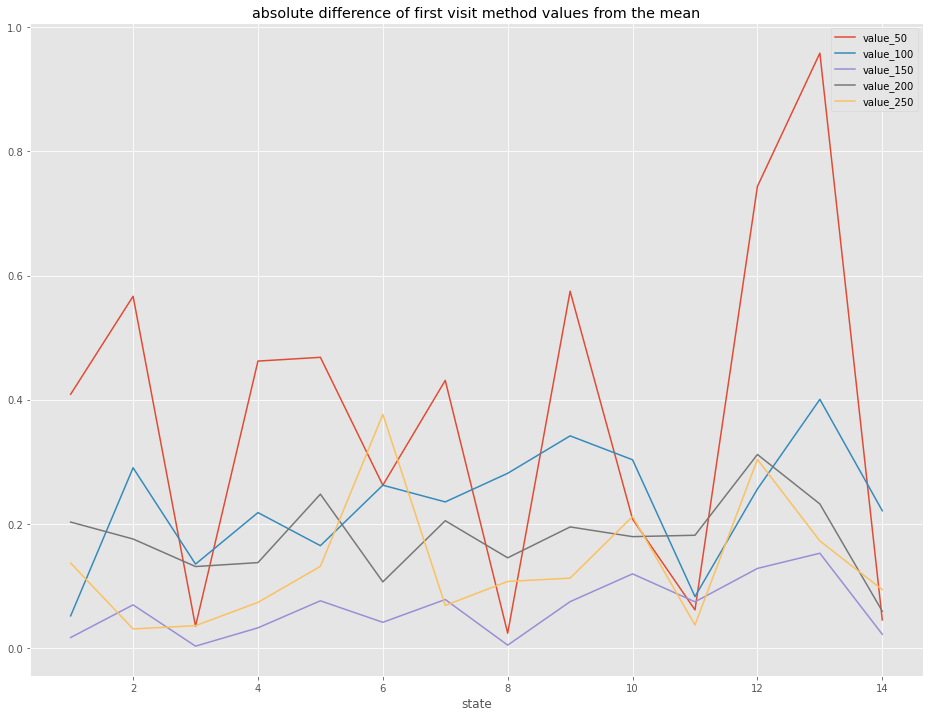

In [558]:
### for first visit method

mean_val = df_1_comb.mean(axis=1)
df_1_comb.subtract(mean_val,axis=0).abs().plot(figsize=(16,12),title = "absolute difference of first visit method values from the mean")

<AxesSubplot:title={'center':'absolute difference of first visit method values from the mean'}, xlabel='state'>

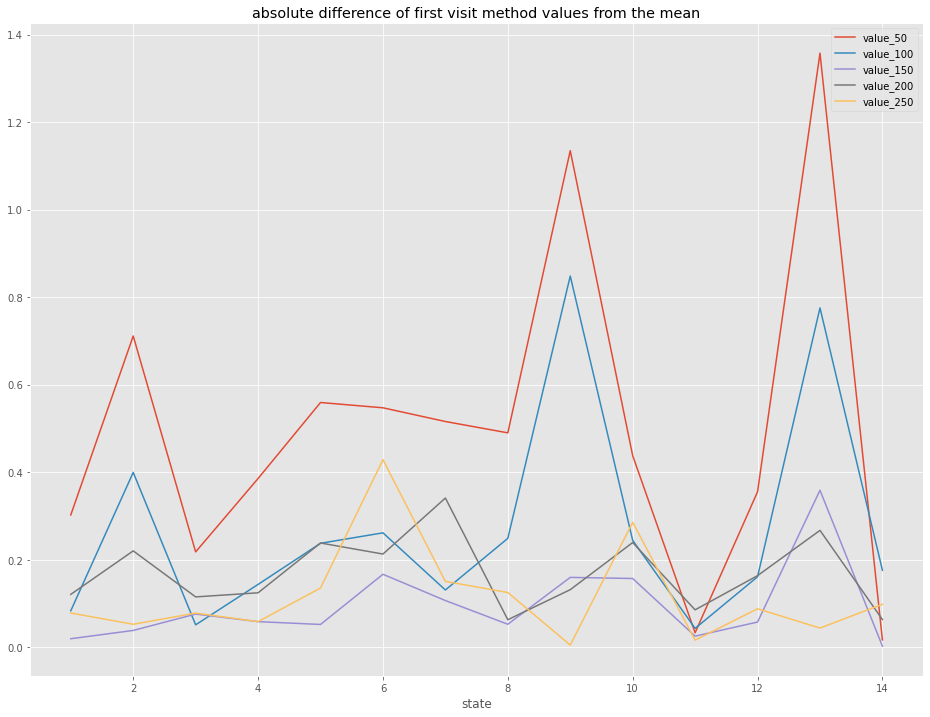

In [559]:
### for every visit method

mean_val = df_2_comb.mean(axis=1)
df_2_comb.subtract(mean_val,axis=0).abs().plot(figsize=(16,12),title = "absolute difference of first visit method values from the mean")

### Observations
- Exploratory start is creating lot of variations in the returns
- instead of mean, median should be taken as ideal averaging approach as mean is affected by large values(outlier)
- As number of episode increases; variation in the value function w.r.t to mean value decreases as iteration increases the difference for largest number of episode will be closer to mean
